<a href="https://colab.research.google.com/github/rachitmishra/ds25/blob/main/ds25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

friendships = {user["id"]: [] for user in users}
for user, friend in friendship_pairs:
    friendships[user].append(friend)
    friendships[friend].append(user)
print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


In [4]:
def number_of_friends(user):
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = sum(number_of_friends(user) for user in users)
print(total_connections)
num_users = len(users)
avg_connections = total_connections / num_users
print(avg_connections)

24
2.4


In [ ]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id.sort(
    key = lambda id_and_friends: id_and_friends[1],
    reverse = True
)
print(num_friends_by_id)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [ ]:
def foaf_ids_bad(user):
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]
print(foaf_ids_bad(users[0]))

[0, 2, 3, 0, 1, 3]


In [5]:
from collections import Counter
def friends_of_friends(user):
  user_id = user["id"]
  return Counter(
      foaf_id
      for friend_id in friendships[user_id]
      for foaf_id in friendships[friend_id]
      if foaf_id != user_id and foaf_id not in friendships[user_id]
  )
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [7]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

def data_scientists_who_like(target_interest):
  return [user_id
          for user_id, user_interest in interests
          if user_interest == target_interest]

In [13]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

print(user_ids_by_interest)

interests_by_user_ids = defaultdict(list)

for user_id, interest in interests:
  interests_by_user_ids[user_id].append(interest)

print(interests_by_user_ids)

defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})
defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression'

NameError: name 'interests_by_user_id' is not defined

In [14]:
def most_common_interests_with(user):
  return Counter(
      interested_user_id
      for interest in interests_by_user_ids[user["id"]]
      for interested_user_id in user_ids_by_interest[interest]
      if interested_user_id != user["id"]
  )

most_common_interests_with({"id": 0})

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [21]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
print(average_salary_by_tenure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


In [23]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
      return "more than five"

salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
print(average_salary_by_bucket)


{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


In [26]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

words_and_counts = Counter(
    word
    for user, interest in interests
    for word in interest.lower().split())

for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [27]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
# Functions
def another_double(x): return 2*x
another_double = lambda x: 2*x

# String interpolation
fn = "Raj"
ln = "Simran"
f_n = f"{fn} {ln}"
print(f_n)

# Exceptions
try:
    print(0/0)
except ZeroDivisionError:
    print("cannot divide by zero")

In [ ]:
# List
integer_list = [1, 2, 3]
len(integer_list)
sum(integer_list)
integer_list[-2]
copy_of_int_list = integer_list[:]
copy_of_int_list
1 in integer_list

In [2]:
# Typing
from typing import Dict, Iterable, Tuple, Callable
counts: Dict[str, int] = {'data': 1, 'science': 2}
if True:
    evens: Iterable[int] = (x for x in range(10) if x%2 == 0)
else:
    evens = [0, 2, 4, 6, 8]
print(evens)

<generator object <genexpr> at 0x7c39d772c580>


In [3]:
#Randomness
import random
random.seed(10)
four_uniform_randoms = [random.random() for _ in range(4)]
print(four_uniform_randoms)

[0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174]


In [6]:
users = ["sin", "cos", "tan", "theta"]
for i, name in enumerate(users):
    print(f"name {i} is {name}")

name 0 is sin
name 1 is cos
name 2 is tan
name 3 is theta


In [ ]:
# vargs kvargs
def magic(*args, **kwargs):
    print("unnamed args:", args)
    print("keyword args:", kwargs)
magic(1, 2, key="word", key2="word2")

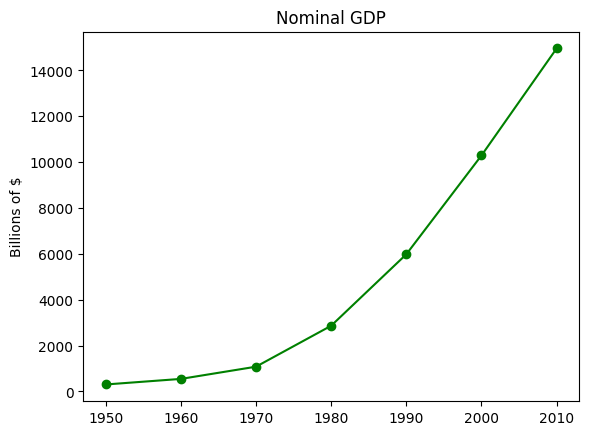

In [7]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.show()

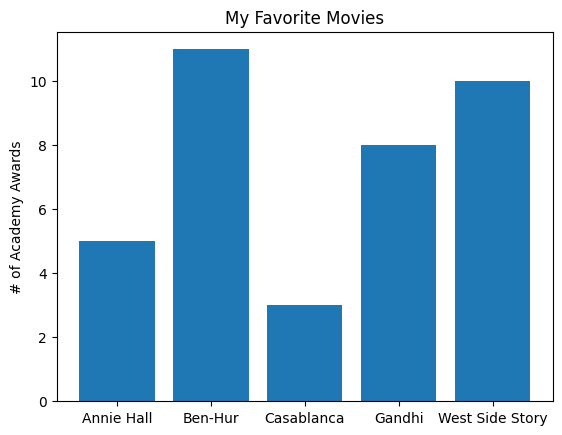

In [9]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
plt.bar(range(len(movies)), num_oscars)
plt.title("My Favorite Movies")
plt.ylabel("# of Academy Awards")
plt.xticks(range(len(movies)), movies)
plt.show()

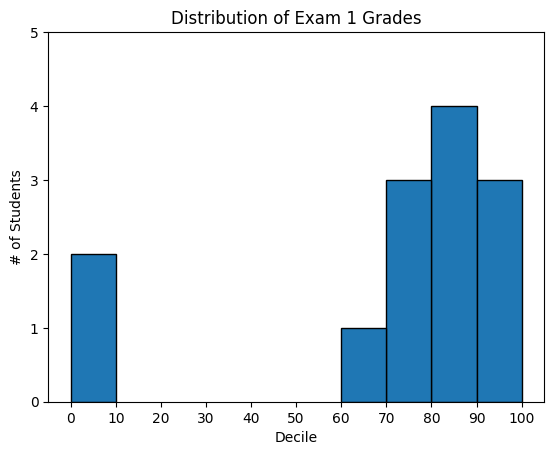

In [15]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

histogram = Counter(min(grade // 10* 10, 90) for grade in grades)
plt.bar([x+5 for x in histogram.keys()],
        histogram.values(),
        10,
        edgecolor=(0, 0, 0))
plt.axis([-5, 105, 0, 5])
plt.xticks([10*i for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

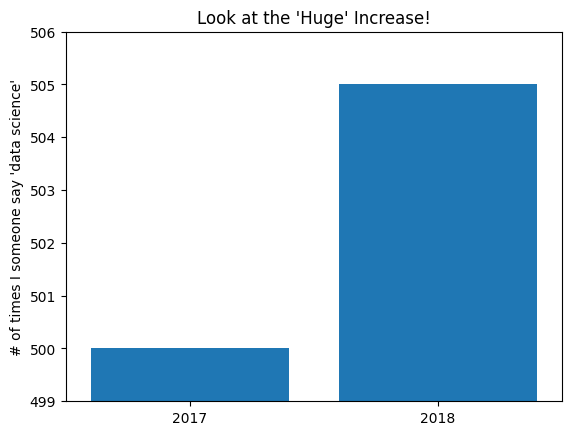

In [19]:
mentions = [500, 505]
years = [2017, 2018]
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I someone say 'data science'")
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

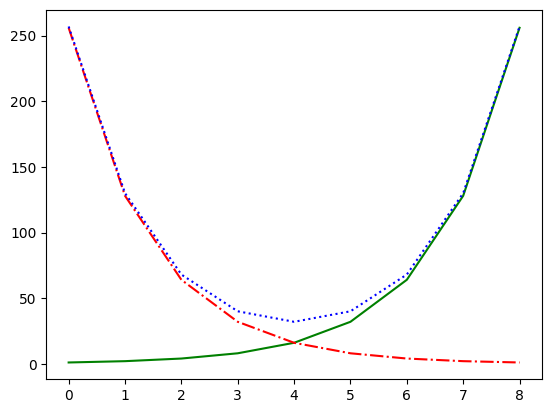

In [20]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
plt.plot(xs, variance,     'g-',  label='variance')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')
plt.plot(xs, total_error,  'b:',  label='total error')